<a href="https://colab.research.google.com/github/philnumpy/PRML-PROJECT/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd #panel data that helps manipulate data
import numpy as np
from sklearn.preprocessing import StandardScaler#to scale and normalise data
import matplotlib.pyplot as plt

In [2]:
#loading the original dataset
original_data=pd.read_csv('spotify_tracks.csv')

In [3]:
#getting data info to detect any null or duplicate values
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [4]:
#dropping any duplicate values
original_data.drop_duplicates()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.02410,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.08510,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.03110,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.22700,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.01530,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,3eHDwMQYPEziy2DWRBNoLv,Sani - G.O.A.T Remix,"Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...",2021,30,https://i.scdn.co/image/ab67616d0000b273819d23...,Sani (G.O.A.T Remix),0.08490,0.877,359718.0,...,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504,https://open.spotify.com/track/3eHDwMQYPEziy2D...,Tamil
62313,5hHtCqkNv5eo99OrEFFcgS,Life of Bachelor,"A H Kaashif, Navakkarai Naveen Prabanjam, Asal...",2021,30,https://i.scdn.co/image/ab67616d0000b2736cd651...,Bachelor (Original Motion Picture Soundtrack),0.07880,0.833,154364.0,...,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524,https://open.spotify.com/track/5hHtCqkNv5eo99O...,Tamil
62314,08foF9YHgKmIgOy3xMWRZy,Yo Baby,"Rakesh Ambigapathy, Asal Kolaar, MC Vickey",2021,18,https://i.scdn.co/image/ab67616d0000b27300da25...,Yo Baby,0.00918,0.842,234000.0,...,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669,https://open.spotify.com/track/08foF9YHgKmIgOy...,Tamil
62315,2wLFbVlQGKJSd9lwzwL47F,Fast Fast Vadiley,"Asal Kolaar, Priyadarshan Balasubramanian",2021,1,https://i.scdn.co/image/ab67616d0000b273e051e1...,Arjuna Phalguna,0.10100,0.682,180807.0,...,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439,https://open.spotify.com/track/2wLFbVlQGKJSd9l...,Tamil


In [5]:
for col in original_data.columns:
  original_data.dropna(inplace=True)

In [6]:
original_data.isnull().sum() #checking again

,0
track_id,0
track_name,0
artist_name,0
year,0
popularity,0
artwork_url,0
album_name,0
acousticness,0
danceability,0
duration_ms,0


In [7]:
original_data.shape

(62317, 22)

In [8]:
#creating a seperate file that store names of all songs
song_name=original_data['track_name']

In [9]:
#function to get data of songs belonging to a particular language
def get_language_song(data,language):
  language_songs=original_data[original_data['language'].str.contains(language, case=False)]
  return pd.DataFrame(language_songs)

In [10]:
#data containing only audio features
dataframe_features=original_data.iloc[:,7:20]

In [11]:
dataframe_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      62317 non-null  float64
 1   danceability      62317 non-null  float64
 2   duration_ms       62317 non-null  float64
 3   energy            62317 non-null  float64
 4   instrumentalness  62317 non-null  float64
 5   key               62317 non-null  float64
 6   liveness          62317 non-null  float64
 7   loudness          62317 non-null  float64
 8   mode              62317 non-null  float64
 9   speechiness       62317 non-null  float64
 10  tempo             62317 non-null  float64
 11  time_signature    62317 non-null  float64
 12  valence           62317 non-null  float64
dtypes: float64(13)
memory usage: 6.2 MB


In [15]:
sc=StandardScaler()
dataframe=sc.fit_transform(dataframe_features)  #to centre and scale the data preparing it for PCA s.t. mean is zero and standard deviation is 1

<h1>KMEANS

**K means** is an ***unsupervised machine learning*** technique that helps us group *unlabeled* data into various clusters on the basis of their similarity.

It is a ***“hard”*** clustering method. This form of grouping stipulates that a data point can exist in just one cluster.

It is an ***iterative, centroid-based*** clustering algorithm that partitions a dataset into similar groups based on the distance between their centroids. The centroid, or cluster center, is either the mean or median of all the points within the cluster depending on the characteristics of the data.



---



**<h3>Importing all important libraries**

In [16]:
import numpy as np
import pandas as pd #panel data that helps manipulate data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to train test and split just in case
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.preprocessing import StandardScaler #to scale and normalise data

**Importing Data**

In [17]:
def get_language_song(original_data, data_scaled, language="hindi"):
    # Get indices of Hindi songs
    hindi_song_indices = original_data[original_data['language'].str.contains(language, case=False, na=False)].index

    # Filter scaled data to keep only Hindi songs
    hindi_songs_scaled = data_scaled[hindi_song_indices]

    return hindi_songs_scaled


In [18]:
songs_scaled = get_language_song(original_data,dataframe)

# Check the shape of the filtered dataset
print(songs_scaled.shape)  # (number_of_hindi_songs, num_features)
print(songs_scaled)

(5740, 13)
[[-0.26156992  0.46825969 -0.50199583 ... -0.41741733  0.2843186
  -0.16702689]
 [-1.06701972  0.38770424 -0.10430214 ... -0.87393615  0.2843186
  -0.0348441 ]
 [-1.14937649  0.23733406 -1.13570041 ... -0.87428691  0.2843186
  -0.45027574]
 ...
 [-0.89092691  0.01177879  0.05221249 ...  1.47667099  0.2843186
  -0.15947359]
 [ 1.19421544  0.11918606 -0.41835794 ... -0.97769202  0.2843186
   0.18797833]
 [-1.10134828 -0.48229464 -0.63876692 ... -0.45551026  0.2843186
  -1.00922014]]


**<H3>PCA**

In SKLEARN,
Variation is calculated as:

(measurement-mean)^2/no. of samples

Below is the part where we do all the meansurements

In [37]:
from sklearn.decomposition import KernelPCA
#reducing the number of components to 2 since it is easier to observe in terms of clusters
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)  # Adjust gamma for non-linearity
data_kpca = kpca.fit_transform(songs_scaled)

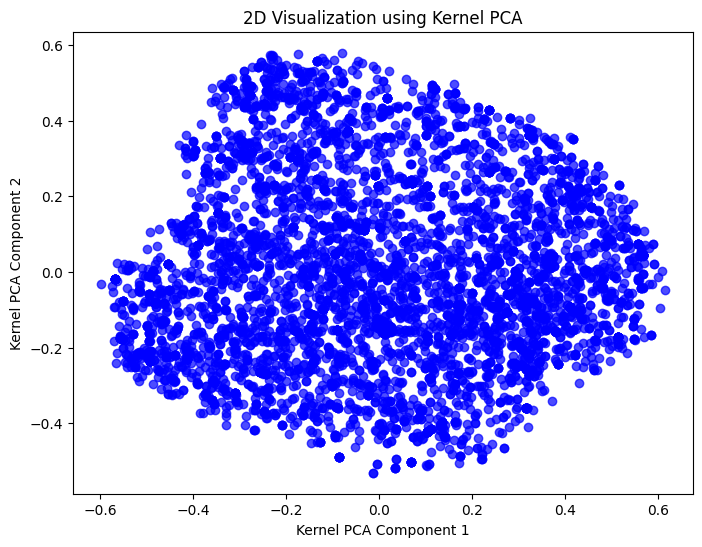

In [38]:
import matplotlib.pyplot as plt

df_pca = pd.DataFrame(data_kpca, columns=['KPCA1', 'KPCA2'])

# Plot first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['KPCA1'], df_pca['KPCA2'], c='blue', alpha=0.7)
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.title('2D Visualization using Kernel PCA')
plt.show()

**<h3>Optimising K means</h3>**

1. **Properly selecting the initial centroids**

 K Means++ is a more advanced method to initialise centroids as starting them out as random is a always a bad choice.


In [21]:
#K-Means++ for initial centroids
def kmeans_plus_plus(X, k): #gets data and k's value
    """Initialize centroids using K-Means++ method."""
    np.random.seed(42)  # For reproducibility
    n_samples = X.shape[0]

    #Randomly selecting the first centroid
    centroids = [X[np.random.randint(n_samples)]]

    for i in range(1, k):
        #Computing squared distances to the nearest centroid
        distances = np.array([min(np.linalg.norm(x - c) ** 2 for c in centroids) for x in X])

        #Choosing next centroid on the basis of probability proportional to distance²
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(n_samples, p=probabilities)

        # Adding the new centroid
        centroids.append(X[new_centroid_index])

    return np.array(centroids)

In [22]:
class KMeansFromScratch:
    def __init__(self, k=None, max_k=10, max_iters=100, tol=1e-4, auto_k=True):
        """
        k: Number of clusters (if None, auto-detect using Elbow method)
        max_k: Max clusters for Elbow method (used if auto_k=True)
        max_iters: Maximum iterations for convergence
        tol: Tolerance to stop iterations early
        auto_k: If True, automatically find the best k using Elbow method
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.auto_k = auto_k
        self.max_k = max_k

    def fit(self, X):

        if self.auto_k and self.k is None:
            self.k = self.find_optimal_k(X)  # Find best k before clustering
        # Using K-Means++ for better initialisation
        self.centroids = kmeans_plus_plus(X, self.k)

        for i in range(self.max_iters):
            #Assigning points to nearest centroid, this is where clusters are forming
            #np.argmin returns the index of the closest centroid
            self.labels = np.array([np.argmin([np.linalg.norm(x - c) for c in self.centroids]) for x in X]) #euclidean distance is being considered

            #Computing new centroids
            '''
            For each cluster j, calculating the mean of all points assigned to it.

            This updates the centroid locations based on the new cluster assignments.
            for eg.
            cluster 1: (1,2) and (2,4) new mean will be (1.5,3) New Centroid-1
            cluster 2: (0,2) and (1,1.5) new mean will be (0.5,1.75) New Centroid-2
            '''
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            #Checking for convergence
            '''
            If centroids don’t change much (tol = small threshold),we stop iterating.

            This ensures that the algorithm stops when clusters are stable.
            '''
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids  # Update centroids and the loop continues

    def predict(self, X):
        return np.array([np.argmin([np.linalg.norm(x - c) for c in self.centroids]) for x in X])

    def find_optimal_k(self, X):
        """ Automatically find the best k using the Elbow Method & Knee Point """
        wcss = []
        for k in range(1, self.max_k + 1):
            kmeans = KMeansFromScratch(k=k, auto_k=False)  # Run K-Means manually
            kmeans.fit(X)
            wcss.append(sum(np.linalg.norm(X[kmeans.labels == j] - kmeans.centroids[j]) ** 2 for j in range(k)))

        return self.knee_locator(range(1, self.max_k + 1), wcss)

    @staticmethod
    def knee_locator(x, y):
        """ Find the 'knee' point (elbow) in the WCSS graph """
        x, y = np.array(x), np.array(y)
        # Compute second derivative (curvature)
        diff = np.gradient(y, edge_order=2)
        elbow_index = np.argmin(diff) + 1  # Adding 1 to match k index
        return x[elbow_index]

    def plot_elbow(self, X):
        """ Plot WCSS vs. k to visualize the Elbow Method """
        wcss = []
        for k in range(1, self.max_k + 1):
            kmeans = KMeansFromScratch(k=k, auto_k=False)
            kmeans.fit(X)
            wcss.append(sum(np.linalg.norm(X[kmeans.labels == j] - kmeans.centroids[j]) ** 2 for j in range(k)))

        best_k = self.knee_locator(range(1, self.max_k + 1), wcss)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, self.max_k + 1), wcss, marker='o', linestyle='--', color='b')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.title('Elbow Method for Optimal K')
        plt.axvline(x=best_k, linestyle='--', color='r', label=f'Optimal K = {best_k}')
        plt.legend()
        plt.show()
        print(f"Optimal K found: {best_k}")


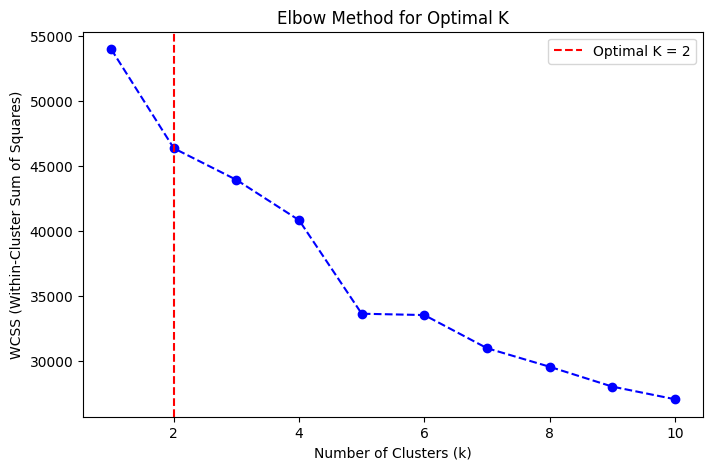

Optimal K found: 2
Sample Cluster Labels: [0 0 0 1 0 0 1 0 0 1]
Centroids Shape: (2, 13)


In [40]:
# Step 1: Create the model (auto-selecting optimal k using elbow method)
model = KMeansFromScratch(auto_k=True, max_k=10)

# Step 2: (Optional) Visualize elbow plot
model.plot_elbow(songs_scaled)

# Step 3: Fit the model to the scaled Hindi song data
model.fit(songs_scaled)

# Step 4: Get labels and centroids
hindi_labels = model.labels
hindi_centroids = model.centroids

# Print sample cluster assignments
print("Sample Cluster Labels:", hindi_labels[:10])
print("Centroids Shape:", hindi_centroids.shape)


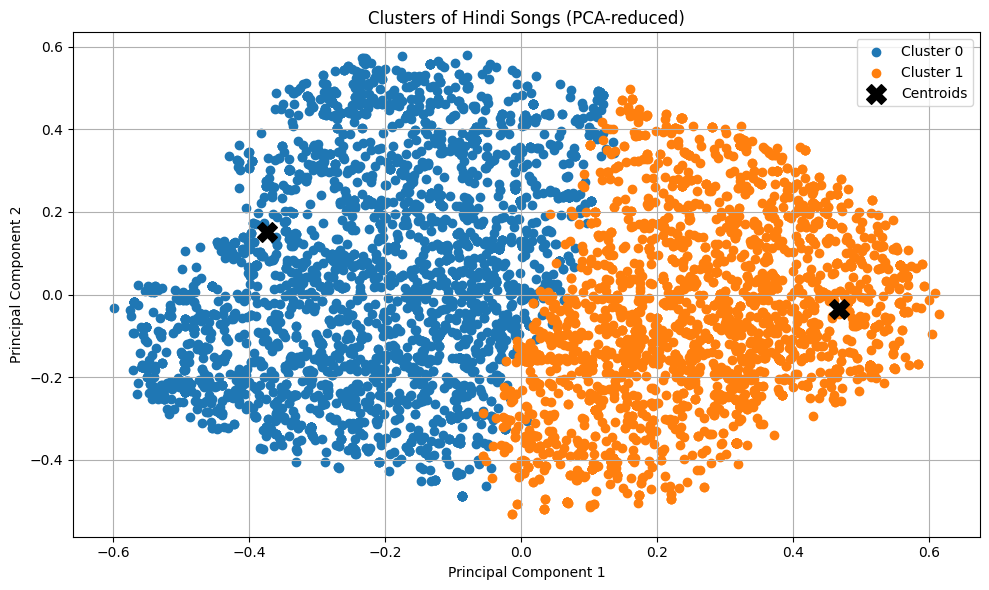

In [43]:
#Visualising clusters
plt.figure(figsize=(10, 6))
for i in range(model.k):
    plt.scatter(
        data_kpca[hindi_labels == i, 0], #using reduced data to visualise in 2d
        data_kpca[hindi_labels == i, 1],
        label=f"Cluster {i}"
    )
centroids_2d = kpca.transform(hindi_centroids)
plt.scatter(
    centroids_2d[:, 0], centroids_2d[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title("Clusters of Hindi Songs (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**<h1>Song Recommender**

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
import re

In [26]:
class SongRecommender:
    def __init__(self, data, song_names, kmeansFromScratch):
        self.data = data
        self.song_names = song_names
        self.kmeans = kmeansFromScratch
        self.labels = kmeansFromScratch.labels

    def _normalize_name(self, name):
        # Lowercase, strip, remove content in parentheses
        name = name.lower().strip()
        name = re.sub(r'\(.*?\)', '', name).strip()
        return name

    def recommend(self, input_song_vector, input_song_name=None, n=7):
        input_cluster = np.argmin([
            np.linalg.norm(input_song_vector - c)
            for c in self.kmeans.centroids
        ])
        print(f"🎯 Input song belongs to cluster: {input_cluster}")

        cluster_indices = np.where(self.labels == input_cluster)[0]
        cluster_songs = self.data[cluster_indices]

        similarities = cosine_similarity([input_song_vector], cluster_songs)[0]
        sorted_indices = np.argsort(similarities)[::-1]

        top_n_indices = []
        input_name_norm = self._normalize_name(input_song_name) if input_song_name else ""

        for i in sorted_indices:
            idx = cluster_indices[i]
            name = self.song_names[idx]
            name_norm = self._normalize_name(name)

            if input_song_name and name_norm == input_name_norm:
                continue  # Skip similar name

            top_n_indices.append(idx)
            if len(top_n_indices) == n:
                break

        print(f"\n🎵 Top {n} recommendations:")
        recommendations = []

        for idx in top_n_indices:
            original_idx = hindi_indices[idx]
            name = self.song_names[idx]
            artist = original_data.loc[original_idx, 'artist_name']
            track_url = original_data.loc[original_idx, 'track_url']
            artwork_url = original_data.loc[original_idx, 'artwork_url']

            sim_score = cosine_similarity([input_song_vector], [self.data[idx]])[0][0]

            print(f"- {name} by {artist} (Similarity: {sim_score:.4f})")
            print(f"  🎧 Track URL: {track_url}")
            print(f"  🖼️ Artwork URL: {artwork_url}\n")

            recommendations.append({
                "name": name,
                "artist": artist,
                "similarity": sim_score,
                "track_url": track_url,
                "artwork_url": artwork_url
            })

        return recommendations


In [29]:
# Get indices of Hindi songs in original_data
hindi_indices = original_data[original_data['language'].str.contains("hindi", case=False, na=False)].index

# Filter songs_scaled and song_names
songs_scaled = get_language_song(original_data, dataframe) # Our scaled Hindi features
data_kpca = kpca.fit_transform(songs_scaled)
song_names_hindi = [song_name[i] for i in hindi_indices]  # Keep song names aligned


In [30]:
# Match song in filtered Hindi names
import os
user_input = os.getenv("USER_INPUT")
#Tries to get input from Flask using an environment variable USER_INPUT.
#If Flask input exists, it uses that.
#Otherwise, it falls back to regular input() so you can still run the notebook manually.
if user_input:
    user_input = user_input.strip().lower()
    print(f"✅ Using input from Flask: {user_input}")
else:
    user_input = input("Enter a song name: ").strip().lower()
    print(f"📝 Using manual input: {user_input}")
matching_indices = [i for i, name in enumerate(song_names_hindi) if name.strip().lower() == user_input]

if not matching_indices:
    print("Song not found in Hindi songs.")
else:
    input_index = matching_indices[0]
    input_song_vector = songs_scaled[input_index]  # <- Use original scaled vector

    # Recommender should also use songs_scaled (not data_pca)
    recommender = SongRecommender(songs_scaled, song_names_hindi, model)
    recommender.recommend(input_song_vector, song_names_hindi[input_index], n=7)

Enter a song name: kesariya
📝 Using manual input: kesariya
🎯 Input song belongs to cluster: 1

🎵 Top 7 recommendations:
- Theethiriyaai by Pritam, Sid Sriram (Similarity: 0.9801)
  🎧 Track URL: https://open.spotify.com/track/2untnNHDMv9CNnt6l3Dfem
  🖼️ Artwork URL: https://i.scdn.co/image/ab67616d0000b2730b94c4ed9918da64cad67573

- Theethiriyaai (From "Brahmastra (Tamil)") by Pritam, Sid Sriram (Similarity: 0.9801)
  🎧 Track URL: https://open.spotify.com/track/5XbHpOBN1vTU3hN1YzLqHL
  🖼️ Artwork URL: https://i.scdn.co/image/ab67616d0000b2736fb6977192c1051bb5a3bf5b

- Theethiriyaai (From "Brahmastra (Tamil)") by Pritam, Sid Sriram (Similarity: 0.9690)
  🎧 Track URL: https://open.spotify.com/track/1FD4U7MUxlqloZNQ0fTa0p
  🖼️ Artwork URL: https://i.scdn.co/image/ab67616d0000b273917f3e2a0c33a18803754368

- Sun Bhi Le by Arijit Singh, Vishal Mishra (Similarity: 0.9653)
  🎧 Track URL: https://open.spotify.com/track/220phBEtdoin5rMiww9h9l
  🖼️ Artwork URL: https://i.scdn.co/image/ab67616d0000

In [ ]:
song_names = original_data["track_name"].tolist()


2. **Optimum number of clusters improves the accuracy**

 It measures the euclidean distance between each data point and its cluster center and chooses the number of clusters based on where change in “within cluster sum of squares” (WCSS) levels off. This value represents the total variance within each cluster that gets plotted against the number of clusters. ***Best K is where the curve forms an elbow (sudden drop, then flattening).***



---



 **<h1> Cluster Evaluation Metrics </h1>**

1. All data points within a cluster should be similar.

2. Clusters should be distinct from each other.

The goal of the k-means clustering algorithm is to minimize the sum of squared errors (SSE)

**<h3>Inertia</h3>**

Inertia is calculated by measuring the distance between a datapoint and its centroid, squaring the distance and summing those squares for each data point in the cluster. The sum or inertial value is the intracluster distance. The lower the sum the better because it means that the datapoints within the cluster are compact or more similar.

**<h3>The Dunn index</h3>**

The second property is measured with the Dunn index. The Dunn index represents the relationship between the minimum intercluster distance and the maximum intracluster distance. Clusters with a high intercluster distance indicate better quality because it means that the clusters are as different from each other as possible.



---



<h3>Sources:


1.   https://www.ibm.com/think/topics/k-means-clustering
2.   List item
3.

